In [1]:
from __future__ import annotations

import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from quant_pml.hedge.market_futures_hedge import MarketFuturesHedge
from quant_pml.runner import build_backtest

from enhanced_momentum.strategies.systematic_momentum import SystematicMomentum
from enhanced_momentum.config.project_experiment_config import ProjectExperimentConfig
from enhanced_momentum.config.project_trading_config import ProjectTradingConfig

QUANTILE = 0.1

In [2]:
strategy = SystematicMomentum(
    mode="long_short",
    quantile=QUANTILE,
)

hedger = MarketFuturesHedge()

In [3]:
strategy_name = strategy.__class__.__name__

preprocessor, runner = build_backtest(
    experiment_config=ProjectExperimentConfig(),
    trading_config=ProjectTradingConfig(),
    rebal_freq="ME",
)

Backtest on 2010-02-01 00:00:00 to 2024-12-31 00:00:00
Num Train Iterations: 179
Num Hedge Iterations: 3773
Num OOS Daily Points: 3755
Avg Num Stocks in Universe: 2533.43


In [4]:
res = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=hedger,
)

Computing NAVs: 100%|██████████| 3754/3754 [00:04<00:00, 823.38it/s]


In [5]:
res.to_pandas().loc[["sharpe", "alpha_benchmark", "ir_benchmark"]]

,value
metric,
sharpe,0.300164
alpha_benchmark,0.012765
ir_benchmark,0.307423


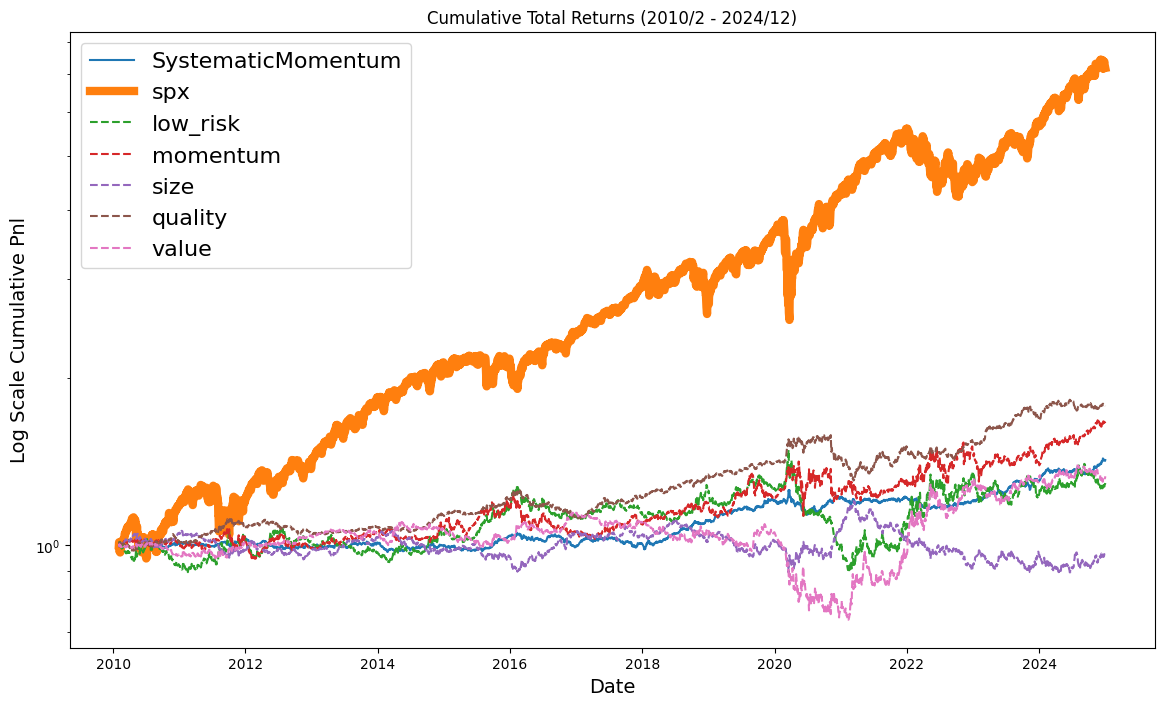

In [6]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

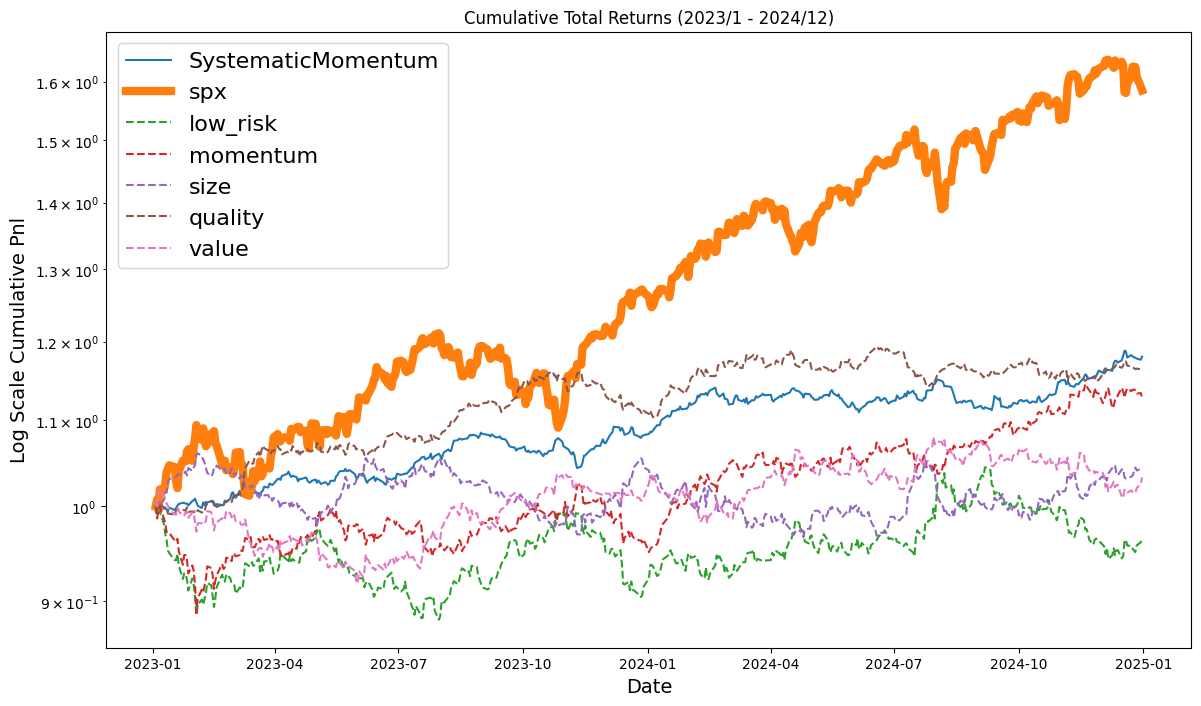

In [7]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
    start_date="2023-01-01",
)

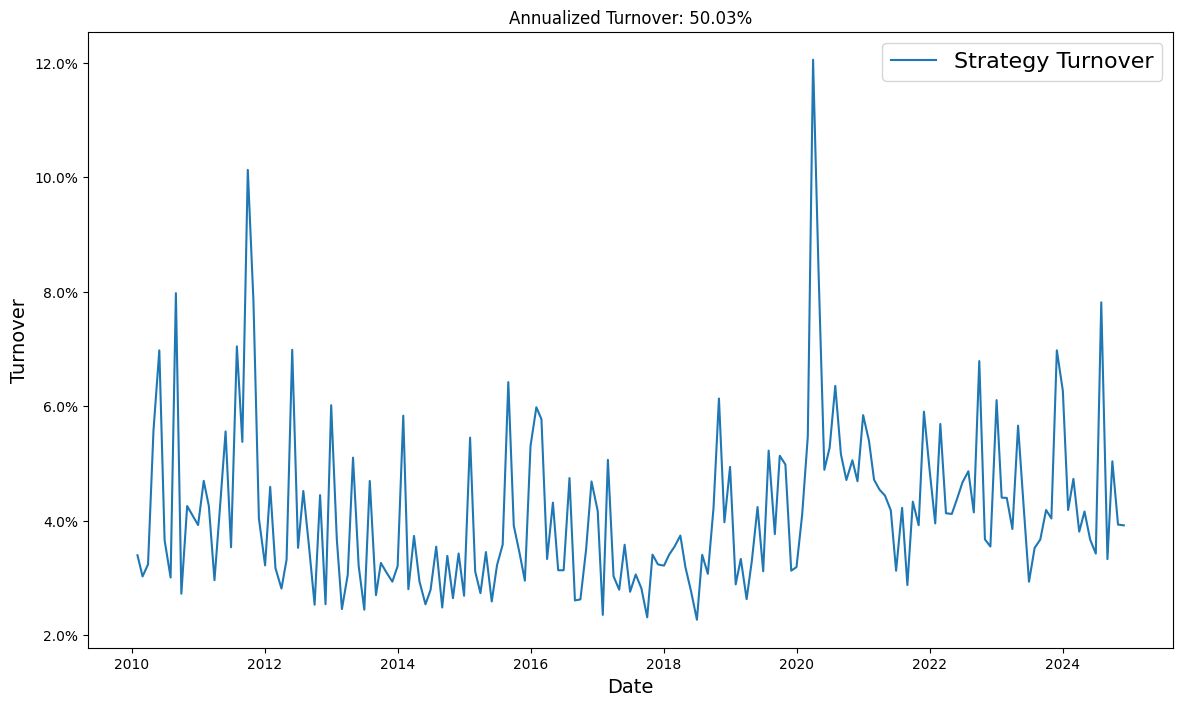

In [8]:
runner.plot_turnover()